In [1]:
import os 
import sys 
import numpy as np

sys.path.append("/Users/bobaebak/git/ai_text_detection")

In [2]:
from utils.file_helper import *
from utils.text_helper import *
from utils.plot_helper import *

In [3]:
from models.gptzero_model import GPTZeroRunner

/Users/bobaebak/anaconda3/envs/ai_detector/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Check on Human Text

In [7]:
file_name = "../data/student_answers.json"
H_texts = load_json_list(file_name)

In [8]:
for item in H_texts:
    try:
        model = GPTZeroRunner('mps', 'gpt2-medium')
        sentence = item['raw']
        
        ppl_dict = model(sentence)
        item['gptzero'] = ppl_dict
        print("============")

    except Exception as err:
        print(f"Unexpected {err=}, {type(err)=}")

sentence length: 6
Perplexity 27
Perplexity per line 220.83333333333334
Burstiness 1072
sentence length: 4
Perplexity 19
Perplexity per line 47.25
Burstiness 92
sentence length: 4
Perplexity 31
Perplexity per line 71.25
Burstiness 139
sentence length: 4
Perplexity 20
Perplexity per line 42.5
Burstiness 78
sentence length: 6
Perplexity 51
Perplexity per line 98.6
Burstiness 159
sentence length: 8
Perplexity 47
Perplexity per line 154.85714285714286
Burstiness 322
sentence length: 11
Perplexity 27
Perplexity per line 73.3
Burstiness 287
sentence length: 7
Perplexity 43
Perplexity per line 213.85714285714286
Burstiness 817
sentence length: 12
Perplexity 31
Perplexity per line 60.916666666666664
Burstiness 130
sentence length: 6
Perplexity 46
Perplexity per line 153.5
Burstiness 319
sentence length: 2
Perplexity 143
Perplexity per line 1198.0
Burstiness 2258
sentence length: 7
Perplexity 40
Perplexity per line 66.42857142857143
Burstiness 131
sentence length: 4
Perplexity 39
Perplexity per

In [9]:
file_name = "../data/gptzero_human.json"
save_json_list(file_name, H_texts)

JSON array saved to ../data/gptzero_human.json


In [10]:
file_name = "../data/gptzero_human.json"
H_gpt_zeros = load_json_list(file_name)

# Check on AI Text

In [29]:
file_name = "../data/gpt_ai_answers.json"
AI_texts = load_json_list(file_name)

In [30]:
for item in AI_texts:
    try:
        model = GPTZeroRunner('mps', 'gpt2-medium')
        sentence = item['raw']
        
        ppl_dict = model(sentence)
        item['gptzero'] = ppl_dict
        print("============")

    except Exception as err:
        print(f"Unexpected {err=}, {type(err)=}")

sentence length: 5
Perplexity 26
Perplexity per line 68.8
Burstiness 124
sentence length: 3
Perplexity 18
Perplexity per line 32.333333333333336
Burstiness 69
sentence length: 5
Perplexity 16
Perplexity per line 25.8
Burstiness 31
sentence length: 6
Perplexity 13
Perplexity per line 25.333333333333332
Burstiness 51
sentence length: 3
Perplexity 40
Perplexity per line 69.0
Burstiness 100
sentence length: 1
Perplexity 17
Perplexity per line 17.0
Burstiness 17
sentence length: 10
Perplexity 26
Perplexity per line 61.625
Burstiness 111
sentence length: 5
Perplexity 15
Perplexity per line 20.4
Burstiness 45
sentence length: 6
Perplexity 27
Perplexity per line 46.5
Burstiness 64
sentence length: 3
Perplexity 48
Perplexity per line 71.33333333333333
Burstiness 135
sentence length: 1
Perplexity 85
Perplexity per line 85.0
Burstiness 85
sentence length: 3
Perplexity 56
Perplexity per line 71.0
Burstiness 89
sentence length: 6
Perplexity 16
Perplexity per line 38.0
Burstiness 74
sentence length:

In [31]:
file_name = "../data/gptzero_ai.json"
save_json_list(file_name, AI_texts)

JSON array saved to ../data/gptzero_ai.json


# Analysis

In [4]:
H_zero_texts = load_json_list("../data/gptzero_human.json")
M_zero_texts = load_json_list("../data/gptzero_ai.json")

In [83]:
human_analysis = []
ai_analysis = []

for idx, (human, ai) in enumerate(zip(H_zero_texts, M_zero_texts)):
    try:
        human_analysis.append((
            human['raw_len'], 
            round(human['gptzero']['perplexity_per_line_score'],1),
            round(human['gptzero']['burstiness'],1), 
            ))
        ai_analysis.append((
            ai['raw_len'], 
            round(ai['gptzero']['perplexity_per_line_score'], 1),
            round(ai['gptzero']['burstiness'],1),  
            ))
    except Exception as e:
        print(idx, e)
    

140 'gptzero'
191 'gptzero'


In [79]:
ai_analysis

[(113, 68.8),
 (64, 32.3),
 (122, 25.8),
 (119, 25.3),
 (64, 69.0),
 (26, 17.0),
 (161, 61.6),
 (57, 20.4),
 (135, 46.5),
 (56, 71.3),
 (12, 85.0),
 (73, 71.0),
 (113, 38.0),
 (8, 7.0),
 (123, 109.0),
 (12, 111.0),
 (95, 70.2),
 (79, 115.0),
 (78, 52.8),
 (64, 48.3),
 (57, 138.0),
 (105, 29.8),
 (72, 103.8),
 (83, 32.4),
 (124, 33.8),
 (70, 147.0),
 (31, 104.8),
 (142, 25.9),
 (60, 72.3),
 (103, 46.2),
 (50, 41.5),
 (96, 48.0),
 (107, 32.6),
 (63, 81.0),
 (96, 95.8),
 (91, 29.2),
 (56, 60.7),
 (74, 87.2),
 (74, 52.0),
 (68, 28.3),
 (75, 34.7),
 (86, 135.8),
 (83, 40.0),
 (31, 70.0),
 (129, 49.3),
 (59, 39.0),
 (51, 38.0),
 (38, 318.0),
 (97, 29.2),
 (101, 79.0),
 (88, 57.0),
 (98, 42.0),
 (39, 21.5),
 (49, 32.0),
 (69, 48.0),
 (124, 54.6),
 (22, 95.0),
 (82, 40.2),
 (47, 50.0),
 (117, 24.1),
 (90, 27.8),
 (93, 24.6),
 (75, 11.5),
 (150, 56.3),
 (117, 58.8),
 (92, 56.4),
 (78, 32.7),
 (186, 48.7),
 (133, 75.2),
 (157, 35.3),
 (111, 64.0),
 (104, 38.8),
 (100, 55.4),
 (69, 76.0),
 (72, 1

In [66]:
for idx, _ in enumerate(human_analysis):
    if _[-1] > 1000:
        print(idx, _)

10 (12, 1198.0)
13 (1, 5098.0)
15 (13, 5089.0)
43 (51, 216230.5)
47 (44, 6347.3)
58 (245, 13088.0)
78 (19, 1766.3)
82 (153, 1126.6)
97 (116, 26447.1)
159 (46, 144687.8)


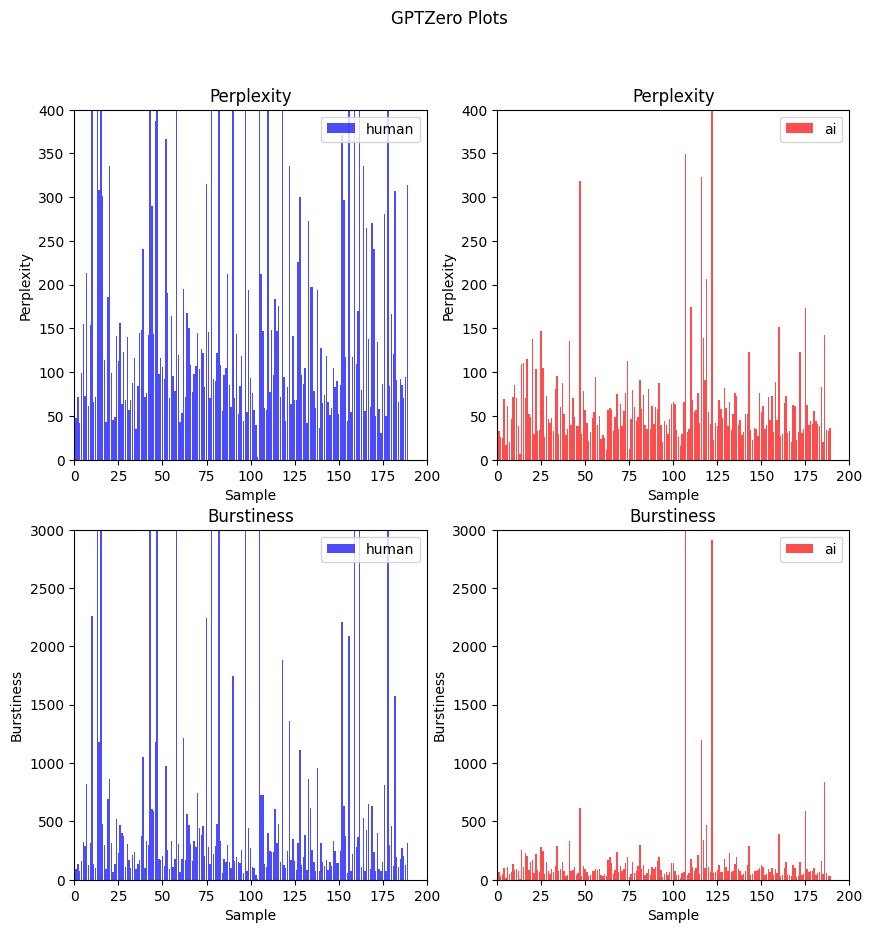

In [90]:


#### Histogram 

helper = PlotHelper(
    row=2, col=2, figsize=(10,10), title="GPTZero Plots",
    plots=[
        PlotItem(ptype="bar", title="Perplexity", 
                 xlabel="Sample", ylabel="Perplexity", xlim=(0, 200), ylim=(0, 400),
                 y=[[human[1] for human in human_analysis]],
                 x=[[human for human in range(len(human_analysis))]],
                 args=[{ "color":"blue", "alpha":0.7, "label": "human"}, ]
        ),

        PlotItem(ptype="bar", title="Perplexity", 
                 xlabel="Sample", ylabel="Perplexity", xlim=(0, 200), ylim=(0, 400),
                 y=[[ai[1] for ai in ai_analysis]],
                 x=[[ai for ai in range(len(ai_analysis))]],
                 args=[{"color":"red", "alpha":0.7, "label": "ai"},]
        ),
        
        PlotItem(ptype="bar", title="Burstiness", 
                 xlabel="Sample", ylabel="Burstiness", xlim=(0, 200), ylim=(0, 3000),
                 y=[[human[2] for human in human_analysis]],
                 x=[[human for human in range(len(human_analysis))]],
                 args=[{ "color":"blue", "alpha":0.7, "label": "human"}, ]
        ),
        PlotItem(ptype="bar", title="Burstiness", 
                 xlabel="Sample", ylabel="Burstiness", xlim=(0, 200), ylim=(0, 3000),
                 y=[[ai[2] for ai in ai_analysis]],
                 x=[[ai for ai in range(len(ai_analysis))]],
                 args=[{"color":"red", "alpha":0.7, "label": "ai"},]
        ),
    ]
)


draws(helper)    

In [47]:
np.max([ai[-1] for ai in human_analysis])

216230.5

# Plot GPTZero

In [4]:
H_texts = load_json_list('../data/gptzero_human.json')
M_texts = load_json_list('../data/gptzero_ai_raidar.json')

### Histogram of GPTZero

In [5]:
# perplexity_per_line_score plot data (threshold)
h_line_ppl = [item['gptzero']['perplexity_per_line_score'] for item in H_texts if item.get("gptzero", None) is not None]
m_line_ppl = [item['gptzero']['perplexity_per_line_score'] for item in M_texts if item.get("gptzero", None) is not None]

# perplexity 
h_ppl = [item['gptzero']['perplexity'] for item in H_texts if item.get("gptzero", None) is not None]
m_ppl = [item['gptzero']['perplexity'] for item in M_texts if item.get("gptzero", None) is not None]

# burstiness
h_burstiness = [item['gptzero']['burstiness'] for item in H_texts if item.get("gptzero", None) is not None]
m_burstiness = [item['gptzero']['burstiness'] for item in M_texts if item.get("gptzero", None) is not None]

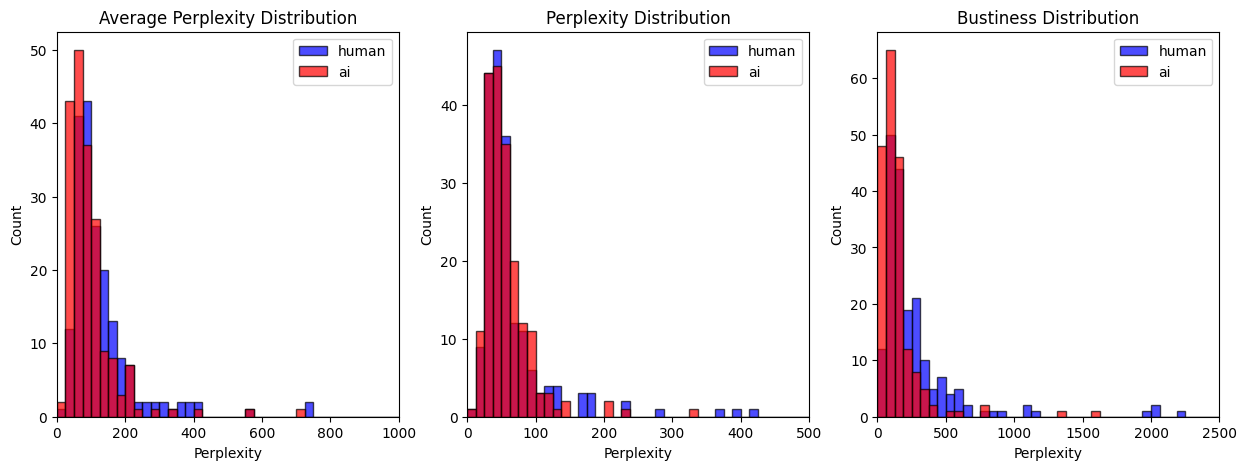

In [8]:
#### Histogram 

helper = PlotHelper(
    row=1, col=3, figsize=(15,5), title="GPTZero Plots",
    plots=[
        PlotItem(ptype="hist", title="Average Perplexity Distribution", xlabel="Perplexity", ylabel="Count", xlim=(0, 1000),
                 x=[h_line_ppl, m_line_ppl,],
                 args=[{"bins":np.linspace(0, 1000, 41), "color":"blue", "edgecolor":"black", "alpha":0.7, "label": "human"}, {"bins":np.linspace(0, 1000, 41), "color":"red", "edgecolor":"black", "alpha":0.7, "label": "ai"},]
        ),
        PlotItem(ptype="hist", title="Perplexity Distribution", xlabel="Perplexity", ylabel="Count", xlim=(0, 500),
                 x=[h_ppl, m_ppl,],
                 args=[{"bins":np.linspace(0, 500, 41), "color":"blue", "edgecolor":"black", "alpha":0.7, "label": "human"}, {"bins":np.linspace(0, 500, 41), "color":"red", "edgecolor":"black", "alpha":0.7, "label": "ai"},]
        ),
        PlotItem(ptype="hist", title="Bustiness Distribution", xlabel="Perplexity", ylabel="Count", xlim=(0, 2500),
                 x=[h_burstiness, m_burstiness,],
                 args=[{"bins":np.linspace(0, 2500, 41), "color":"blue", "edgecolor":"black", "alpha":0.7, "label": "human"}, {"bins":np.linspace(0, 2500, 41), "color":"red", "edgecolor":"black", "alpha":0.7, "label": "ai"},]
        ),
    ]
)


draws(helper)

### Bar of GPTZero

In [5]:
# perplexity_per_line_score plot data (threshold)
h_line_ppl = [item['gptzero']['perplexity_per_line_score'] for item in H_texts if item.get("gptzero", None) is not None]
m_line_ppl = [item['gptzero']['perplexity_per_line_score'] for item in M_texts if item.get("gptzero", None) is not None]

# perplexity 
h_ppl = [item['gptzero']['perplexity'] for item in H_texts if item.get("gptzero", None) is not None]
m_ppl = [item['gptzero']['perplexity'] for item in M_texts if item.get("gptzero", None) is not None]

# burstiness
h_burstiness = [item['gptzero']['burstiness'] for item in H_texts if item.get("gptzero", None) is not None]
m_burstiness = [item['gptzero']['burstiness'] for item in M_texts if item.get("gptzero", None) is not None]

h_y = [_ for _ in range(len(h_line_ppl))]
m_y = [_ for _ in range(len(m_line_ppl))]

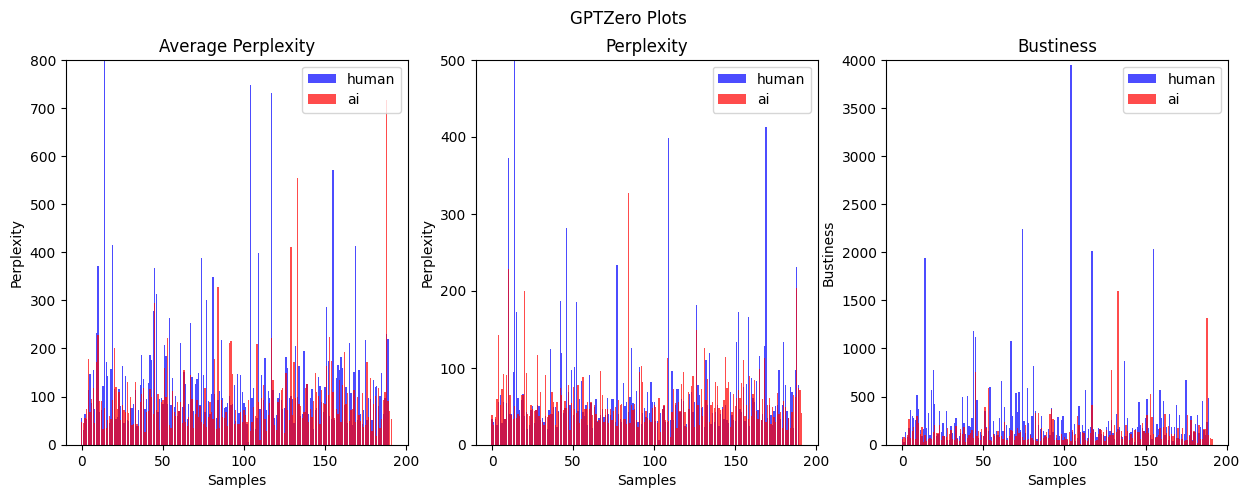

In [9]:
helper = PlotHelper(
    row=1, col=3, figsize=(15,5), title="GPTZero Plots",
    plots=[
        PlotItem(ptype="bar", title="Average Perplexity", xlabel="Samples", ylabel="Perplexity", ylim=(0, 800),
                 y=[h_line_ppl, m_line_ppl,], x=[h_y, m_y,],
                 args=[{"color":"blue", "alpha":0.7, "label": "human"}, {"color":"red", "alpha":0.7, "label": "ai"},]
        ),
        PlotItem(ptype="bar", title="Perplexity", xlabel="Samples", ylabel="Perplexity", ylim=(0, 500),
                 y=[h_ppl, m_ppl,], x=[h_y, m_y,],
                 args=[{"color":"blue", "alpha":0.7, "label": "human"}, {"color":"red", "alpha":0.7, "label": "ai"},]
        ),
        PlotItem(ptype="bar", title="Bustiness", xlabel="Samples", ylabel="Bustiness", ylim=(0, 4000),
                 y=[h_burstiness, m_burstiness,], x=[h_y, m_y,],
                 args=[{"color":"blue", "alpha":0.7, "label": "human"}, {"color":"red", "alpha":0.7, "label": "ai"},]
        ),
    ]
)


draws(helper)